# Working with time series, frequency series, and unit conversion

In this notebook, we show some of the most useful features of the [timeseries](../series.rst) module. To do so, we will analyze a fake gravitational-wave signal. We will also show the [frequencyseries](../series.rst) module and the [unitconv](../unitconv.rst) modules.

First, let's generate this signal. 

(This notebook is meant to be converted in Sphinx documentation and not used directly.)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from kuibit import timeseries as ts
from kuibit import series
from kuibit import unitconv as uc
from kuibit.gw_utils import luminosity_distance_to_redshift

%matplotlib inline

In [2]:
t = np.linspace(0, 20, 5000)
y = np.sin(t)

# Generate a TimeSeries by providing the times and the values of the series
gw = ts.TimeSeries(t, y)

To access the times and the values, use ``gw.t`` and ``gw.y``. You can also iterate over the series with a for loop yielding the elements `(t, y)` at each iteration of the loop. For example.

In [3]:
for tt, yy in gw:
    print(tt, yy)

0.0 0.0
0.004000800160032006 0.004000789486971321
0.008001600320064013 0.008001514935783532
0.012002400480096018 0.012002112309302542
0.016003200640128026 0.016002517572444287
0.020004000800160033 0.020002666693199687
0.024004800960192037 0.024002495643659576
0.028005601120224044 0.028001940401039562
0.03200640128025605 0.03200093694870479
0.03600720144028806 0.03599942127719461
0.040008001600320066 0.03999732938524717
0.04400880176035207 0.0439945972808238
0.048009601920384073 0.04799116098213332
0.05201040208041608 0.05198695651865616
0.05601120224044809 0.055981919932168285
0.060012002400480095 0.059975987277764924
0.0640128025605121 0.06396909462488413
0.0680136027205441 0.06796117805833003
0.07201440288057612 0.07195217367929596
0.07601520304060812 0.07594201760638712
0.08001600320064013 0.07993064597664322
0.08401680336067213 0.08391799494656059
0.08801760352070415 0.08790400069311417
0.09201840368073615 0.09188859941477902
0.09601920384076815 0.09587172733255157
0.10002000400080

-0.08295683031007009
3.2286457291458293 -0.08694316572343935
3.2326465293058613 -0.09092810949141006
3.2366473294658933 -0.09491159782945574
3.2406481296259253 -0.09889356697634603
3.2446489297859573 -0.10287395319516737
3.2486497299459893 -0.10685269277434313
3.2526505301060213 -0.11082972202865338
3.2566513302660534 -0.11480497730025437
3.2606521304260854 -0.11877839495969734
3.2646529305861174 -0.12274991140694709
3.2686537307461494 -0.1267194630723999
3.2726545309061814 -0.13068698641790114
3.2766553310662134 -0.13465241793776223
3.2806561312262454 -0.1386156941597771
3.2846569313862775 -0.14257675164623826
3.2886577315463095 -0.14653552699495212
3.2926585317063415 -0.15049195684025385
3.2966593318663735 -0.15444597785402167
3.300660132026405 -0.15839752674669
3.304660932186437 -0.16234654026826428
3.308661732346469 -0.1662929552093308
3.312662532506501 -0.17023670840207009
3.316663332666533 -0.17417773672126768
3.320664132826565 -0.1781159770853245
3.324664932986597 -0.18205136645

6.325265053010602 0.042067328460986694
6.329265853170634 0.04606423968876922
6.333266653330666 0.05006041359480062
6.337267453490698 0.05405578621480052
6.34126825365073 0.05805029359731424
6.345269053810762 0.06204387180473645
6.349269853970794 0.0660364569143345
6.353270654130826 0.07002798501927168
6.357271454290858 0.07401839222963008
6.36127225445089 0.07800761467343327
6.365273054610922 0.08199558849766864
6.369273854770954 0.08598224986930943
6.373274654930986 0.08996753497633654
6.377275455091018 0.09395138002875987
6.38127625525105 0.09793372125963937
6.385277055411082 0.10191449492610573
6.389277855571114 0.1058936373103807
6.393278655731146 0.10987108472079693
6.397279455891178 0.11384677349281747
6.40128025605121 0.11782063999005479
6.405281056211242 0.12179262060528942
6.409281856371274 0.12576265176148801
6.413282656531306 0.129730669912821
6.417283456691338 0.13369661154567974
6.42128425685137 0.1376604131796932
6.425285057011402 0.1416220113687438
6.429285857171434 0.14

 0.09078601135700667
9.337867573514703 0.0868010168590807
9.341868373674735 0.08281463299104502
9.345869173834767 0.0788269235604769
9.3498699739948 0.07483795239617111
9.353870774154831 0.07084778334711817
9.357871574314863 0.06685648028148243
9.361872374474896 0.06286410708557973
9.365873174634928 0.0588707276628548
9.36987397479496 0.054876405932858474
9.373874774954992 0.050881205830224464
9.377875575115024 0.04688519130364607
9.381876375275056 0.04288842631485257
9.385877175435088 0.03889097483758542
9.38987797559512 0.034892900856574274
9.393878775755152 0.030894268366512823
9.397879575915184 0.02689514137103446
9.401880376075216 0.022895583881687828
9.405881176235248 0.01889565991691221
9.40988197639528 0.01489543350101284
9.413882776555312 0.010894968663136094
9.417883576715344 0.006894329436244628
9.421884376875376 0.002893579856092429
9.425885177035408 -0.0011072160398001565
9.42988597719544 -0.005107994213171436
9.433886777355472 -0.00910869062604339
9.437887577515504 -0.013

12.78255651130226 0.21450587132784937
12.786557311462293 0.21841181650325778
12.790558111622325 0.22231426569601023
12.794558911782357 0.2262131564420198
12.798559711942389 0.23010842633415737
12.80256051210242 0.23400001302325066
12.806561312262453 0.2378878542190821
12.810562112422485 0.24177188769138588
12.814562912582517 0.2456520512708441
12.818563712742549 0.24952828285008188
12.82256451290258 0.2534005203846614
12.826565313062613 0.25726870189407486
12.830566113222645 0.2611327654627371
12.834566913382677 0.26499264924097604
12.838567713542709 0.2688482914460229
12.84256851370274 0.27269963036300127
12.846569313862773 0.27654660434591466
12.850570114022805 0.2803891518186336
12.854570914182837 0.28422721127588074
12.858571714342869 0.28806072128421584
12.8625725145029 0.2918896204830188
12.866573314662933 0.2957138475854718
12.870574114822965 0.29953334137954046
12.874574914982997 0.3033480407289536
12.878575715143029 0.3071578845741817
12.882576515303061 0.3109628119334141
12.8

16.21524304860972 -0.4858013871674135
16.219243848769754 -0.48929446617762057
16.223244648929786 -0.49277971335439114
16.227245449089818 -0.49625707291153254
16.23124624924985 -0.4997264891891043
16.23524704940988 -0.5031879066543091
16.239247849569914 -0.5066412699023818
16.243248649729946 -0.5100865236574759
16.247249449889978 -0.5135236127735485
16.25125025005001 -0.5169524822352435
16.255251050210042 -0.520373077158771
16.259251850370074 -0.5237853427927872
16.263252650530106 -0.5271892245192695
16.267253450690138 -0.5305846678543918
16.27125425085017 -0.5339716184493957
16.275255051010202 -0.5373500220914611
16.279255851170234 -0.5407198247045735
16.283256651330266 -0.5440809723503899
16.287257451490298 -0.5474334112291018
16.29125825165033 -0.5507770876802969
16.295259051810362 -0.5541119481838173
16.299259851970394 -0.5574379393606165
16.303260652130426 -0.5607550079736141
16.307261452290458 -0.5640631009285475
16.31126225245049 -0.5673621652748219
16.315263052610522 -0.57065214

0.33940403004628644
19.199839967993597 0.34316461910781193
19.20384076815363 0.3469197153458458
19.20784156831366 0.3506692586548886
19.211842368473693 0.35441318901832314
19.215843168633725 0.35815144650937514
19.219843968793757 0.3618839712920726
19.22384476895379 0.3656107036222033
19.22784556911382 0.36933158384827136
19.231846369273853 0.37304655241245177
19.235847169433885 0.37675554985154386
19.239847969593917 0.38045851679792314
19.24384876975395 0.3841553939804914
19.24784956991398 0.3878461222256256
19.251850370074013 0.39153064245812474
19.255851170234045 0.3952088957021559
19.259851970394077 0.39888082308219774
19.26385277055411 0.4025463658239832
19.26785357071414 0.40620546525544016
19.271854370874173 0.40985806280763054
19.275855171034205 0.41350410001568794
19.279855971194237 0.4171435185197532
19.28385677135427 0.4207762600659086
19.2878575715143 0.4244022665071106
19.291858371674333 0.42802147980412003
19.295859171834365 0.43163384202643157
19.299859971994398 0.435239

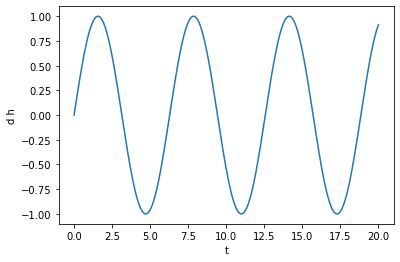

In [4]:
def plot(ser, lab1="d h", lab2="t", *args, **kwargs):
    """Plot Series ser with labels"""
    plt.ylabel(lab1)
    plt.xlabel(lab2)
    plt.plot(ser, *args, **kwargs)
    
plot(gw)

Let's make this more interesting: we square the signal and add Gaussian noise. [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) support directly using all the basic mathematical operations in Python and NumPy, so we can easily square the signal and add another TimeSeries to it.

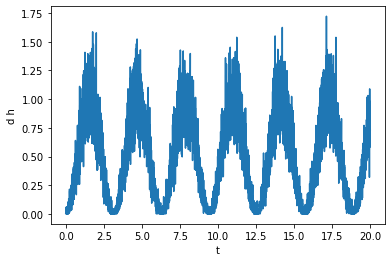

In [5]:
noise = np.random.normal(0, 0.1, len(gw))  # Here we used len() on the TimeSeries
noise_ts = ts.TimeSeries(t, noise)

gw += noise_ts
gw **= 2

plot(gw)

To analyze this signal, first we will smooth it. To do that, we will use the [savgol_smooth_time](../timeseries_ref.html#kuibit.timeseries.TimeSeries.savgol_smooth_time) method, which is a generalized "running average" filter. This method requires length of time over which we want to smooth the data.

In [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) there are always two different methods to do the same task, one with imperative verb (e.g., smooth), and the other with the past tense (e.g., smoothed). The first modifies the data, the second returns a new `TimeSeries` with the operation applied. Here, we will find what smoothing length to use by trial and error, so we will use the second method. 

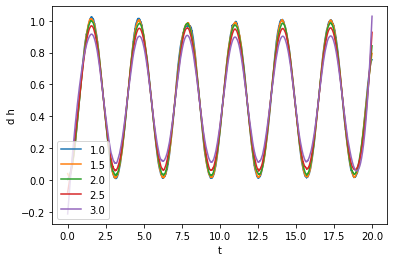

In [6]:
tsmooth = np.linspace(1, 3, 5)

for tsm in tsmooth:
    smoothed = gw.savgol_smoothed_time(tsm)
    plot(smoothed, label=tsm)
plt.legend()

From visual inspection it looks like that ``tsmooth = 1.5`` will work yield a clean series faithful to the original one.

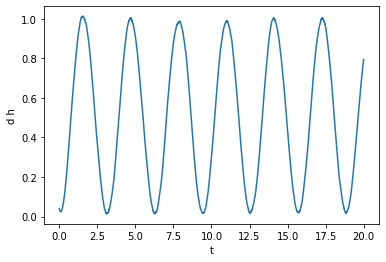

In [7]:
gw.savgol_smooth_time(1.5)
plot(gw)

Next, for fun, we can compute integrals and derivatives. For instance, we can compute what is the integral from 5 to 10.

The integral from 5 to 10 is 2.1888


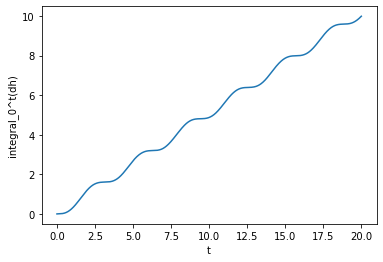

In [8]:
gw_int = gw.integrated()
a = 5
b = 10
print(f"The integral from {a} to {b} is {gw_int(b) - gw_int(a):.4f}")
plot(gw_int, lab1="integral_0^t(dh)")

Here, we showed a very powerful feature of `TimeSeries`: you can call them on a specific time (as we did we ``gw_int(b)``). This is done using splines to interpolate to the points that are not available. Splines can also be used to take derivatives. Alternatively, one can simply take the finite (central) difference. Let's see what's the derivative of ``gw`` using splines and finite difference.

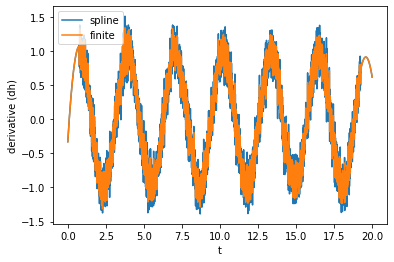

In [9]:
gw_spline_der = gw.spline_differentiated()
gw_numer_der = gw.differentiated()

plot(gw_spline_der, label='spline')
plot(gw_numer_der, lab1="derivative (dh)", label='finite')
plt.legend()

Clearly, derivatives will be noisier than the actual data, so often it is convenient to smooth them out as shown before.

TimeSeries support complex signals. Now, we will create one using `gw` itself. We will copy `gw`, time-shift it, find the common time interval with the original `gw`, and use that as a the imaginary part.

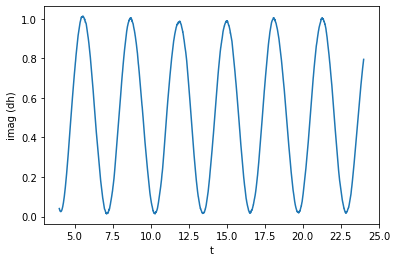

In [10]:
gw_imag = gw.copy()  # It is important to deep copy the object
gw_imag.time_shift(4)

plot(gw_imag, lab1 ="imag (dh)")

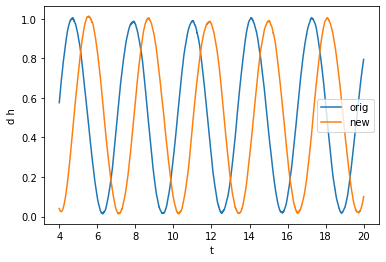

In [11]:
gw, gw_imag = series.sample_common([gw, gw_imag], resample=True)  # Resampling to common times

plot(gw, label="orig")
plot(gw_imag, label="new")
plt.legend()

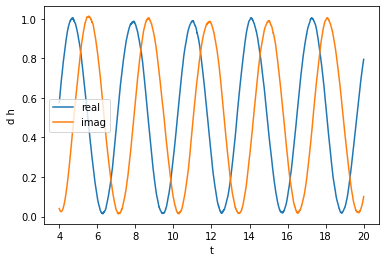

In [12]:
gw_complex = ts.TimeSeries(gw.t, gw.y + 1j * gw_imag.y)

plot(gw_complex.real(), label="real")
plot(gw_complex.imag(), label="imag")
plt.legend()

We can also compute the phase and absolute value. In particular, we will compute the unfolded phase (no wrapping over $2\pi$)

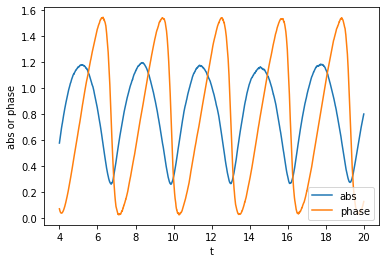

In [13]:
plot(gw_complex.abs(), label='abs')
plot(gw_complex.unfolded_phase(), lab1="abs or phase", label='phase')
plt.legend()

Here, the unfolded phase looks a little bit unusual. This is because we made up the signal.

We can also compute the frequency of the phase, which we can directly smooth.

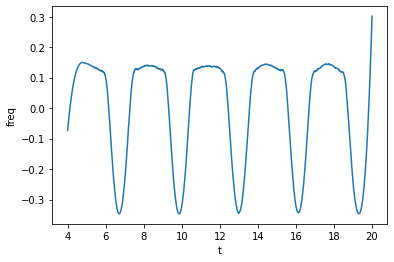

In [14]:
plot(gw_complex.phase_frequency(tsmooth=1.5), lab1="freq")

Next, we will take a Fourier transform. Before, let's pretend that the signal was in geometrized units (as in simulations), and let's make it physical assuming a scale of $M = 1 M_\odot$. For that, use the [unitconv](../unitconv.rst) module. We define a CU object that knows how to convert units.

In [15]:
CU = uc.geom_umass_msun(1) 

# How to convert from geometrized length to physical length?
# Simply multiply times CU.length. Let's check that it is 1.477 km
CU.length  # m

1476.6436994724972

Now we rescale `gw`, assuming that `y` is strain times distance (as usually is). Let's assume a distance of 500 Mpc.

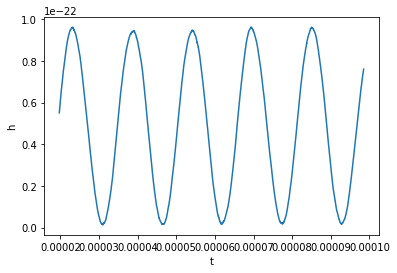

In [16]:
d_Mpc = 500

# inverse = True means from geometrized to physical
gw_physical = gw_complex.time_unit_changed(CU.time, inverse=True)  

gw_physical *= CU.length  # dh -> dh physical
# Now just the strain, since we assume a distance
gw_physical /= (d_Mpc * uc.MEGAPARSEC_SI)

# We have to manually add the redshift
gw_physical.redshifted(luminosity_distance_to_redshift(d_Mpc))

plot(gw_physical.real(), lab1="h")

Okay, now before taking the Fourier transform, we will remove the mean and window our signal. A Tukey window will work.

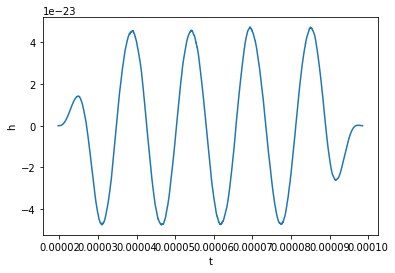

In [17]:
gw_physical.mean_remove()
gw_physical.tukey_window(0.3)
plot(gw_physical.real(), lab1="h")

Finally, we can take the Fourier transform. This is easy to do:

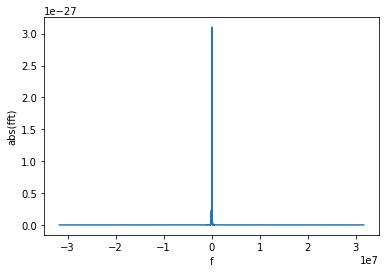

In [18]:
gw_fft = gw_physical.to_FrequencySeries()

# Plotting the amplitude of the Fourier transform
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

The new object is a `FrequencySeries`. It is very similar to a `TimeSeries` and it shares several properties, methods, and features. 

Let's restrict to only positive frequencies close to zero.

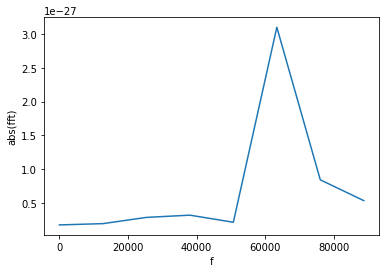

In [19]:
gw_fft.crop(0, 1e5)
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

We can find the frequency of that peak! For this, we find all the peaks with amplitude larger than 1e-27.

Frequency: 64206.12


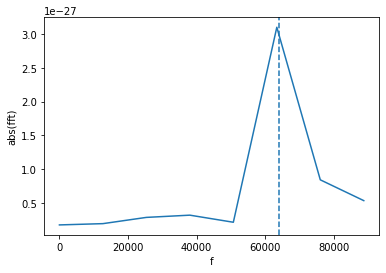

In [20]:
f_peak = gw_fft.peaks_frequencies(1e-27)[0]

print(f"Frequency: {f_peak:.2f}")
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")
plt.axvline(f_peak, ls = 'dashed')

The line is not on the maximum because we use a quadratic interpolation to find a more accurate location of the peak.

Sometimes, it is useful to ignore some data (or example, when we know that the data is invalid). `Series` objects support _masks_ to mark the points we want to ignore. Most functions work transparently with masks: for example, if you ask for the mean of a `Series`, the masked point will be ignored. Other functions do not support masks (most notably, splines). In that case, it is best to completely remove the masked points and work with clean data.

In [21]:
# Let's mask all the point in the spectrum with value larger than 1e-27

spectrum = gw_fft.abs()

print(f"Maximum without mask {spectrum.max():.3e}")

# Apply mask
spectrum.mask_greater(1e-27)

print(f"Maximum with mask {spectrum.max():.3e}")

print(f"Length with mask {len(spectrum)}")

# Remove points
spectrum.mask_remove()

print(f"Length after having removed the masked points {len(spectrum)}")

Maximum without mask 3.101e-27
Maximum with mask 8.409e-28
Length with mask 8
Length after having removed the masked points 7
